<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

<h3 style="color: #FF6347;">-- Insert your code here --</h3>

---

Make sure to import all the libraries you will need to complete your tasks in this challenge.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [2]:
asset_information = pd.read_csv("asset_information_data.csv")
asset_price = pd.read_csv("asset_price_data.csv")
portfolio_weights = pd.read_csv("portfolio_weights.csv")

In [3]:
asset_information.head()

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [4]:
asset_price.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [5]:
portfolio_weights.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [6]:
# calculate the daily percentage returns for each asset.
asset_price.set_index('date', inplace=True) # set the index of asset_price to 'date'
daily_returns = asset_price.pct_change().dropna() # get the fractional change from the previous immediate row

print(daily_returns.head())

              Asset1    Asset2    Asset3    Asset4    Asset5
date                                                        
2019-01-03 -0.002032 -0.016072 -0.005699 -0.002707 -0.009432
2019-01-04 -0.002740  0.020954  0.025255 -0.001125  0.019242
2019-01-07 -0.001512  0.012632 -0.007338  0.001856  0.014792
2019-01-08 -0.001535  0.001003  0.007040  0.003605 -0.000192
2019-01-09  0.001976  0.012919  0.002272  0.004120  0.014003


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [7]:
# Calculate the correlation matrix
correlation_matrix = daily_returns.corr()

print(correlation_matrix)

          Asset1    Asset2    Asset3    Asset4    Asset5
Asset1  1.000000 -0.088341 -0.061253  0.102252 -0.106484
Asset2 -0.088341  1.000000  0.852491  0.526634  0.591399
Asset3 -0.061253  0.852491  1.000000  0.511550  0.557414
Asset4  0.102252  0.526634  0.511550  1.000000  0.421155
Asset5 -0.106484  0.591399  0.557414  0.421155  1.000000


<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

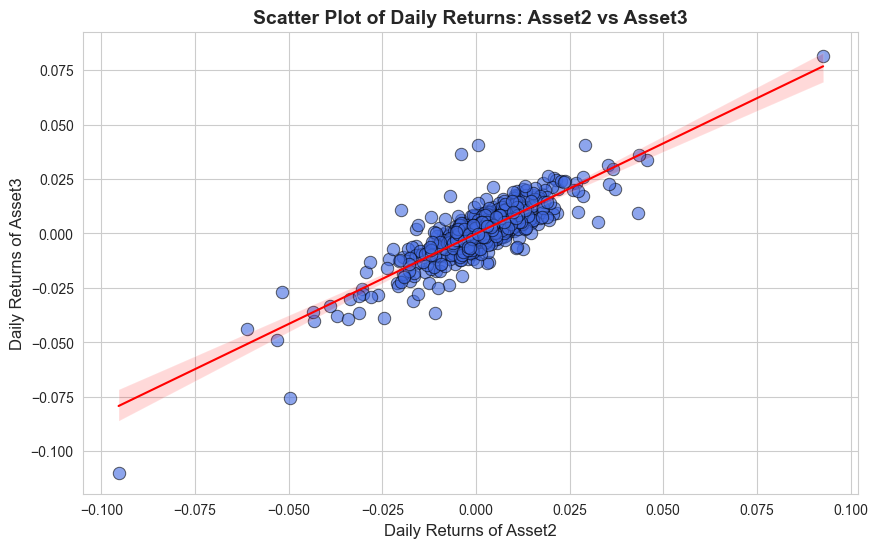

In [8]:
# Set Seaborn style
sns.set_style("whitegrid")

# Choose two specific assets for the scatter plot
asset_x = 'Asset2'
asset_y = 'Asset3'

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=daily_returns[asset_x], y=daily_returns[asset_y], 
                alpha=0.6, color="royalblue", edgecolor="black", s=80)

# Optional: Add regression line (comment if not needed)
sns.regplot(x=daily_returns[asset_x], y=daily_returns[asset_y], 
            scatter=False, color="red", line_kws={"linewidth": 1.5})

# Titles and labels
plt.title(f'Scatter Plot of Daily Returns: {asset_x} vs {asset_y}', fontsize=14, fontweight='bold')
plt.xlabel(f'Daily Returns of {asset_x}', fontsize=12)
plt.ylabel(f'Daily Returns of {asset_y}', fontsize=12)

# Show plot
plt.show()

**A strong positve correlation (≈ 0.8525) between assets 2 and 3 is evident from the scatter plot above. However, we cannot conclude a causal relationship yet, unless further analysis is done.**

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

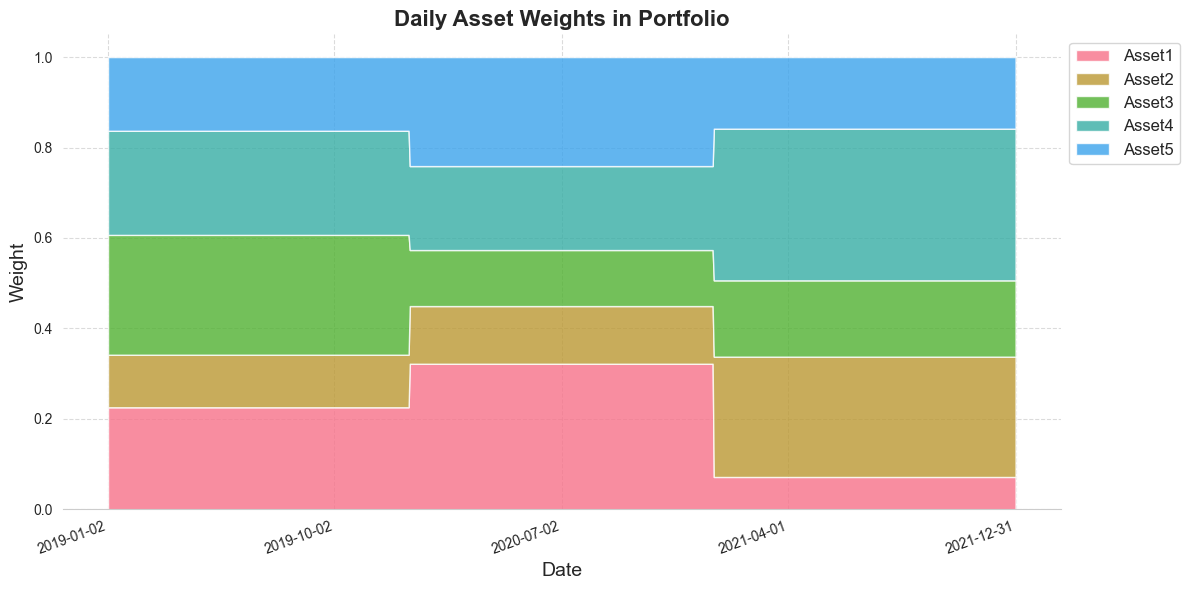

In [9]:
# Ensure 'date' is the index in portfolio_weights
portfolio_weights.set_index('date', inplace=True)

# Set seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")  # Use a nice color palette

# Create the area chart
plt.figure(figsize=(12, 6))
plt.stackplot(portfolio_weights.index, portfolio_weights.T, labels=portfolio_weights.columns, alpha=0.8)

# Add labels, title, and legend
plt.title('Daily Asset Weights in Portfolio', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weight', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)  # Place legend outside the plot
plt.grid(True, linestyle='--', alpha=0.7)

# Select 5 evenly spaced dates for x-axis labels
num_ticks = 5
tick_positions = np.linspace(0, len(portfolio_weights.index) - 1, num_ticks, dtype=int)
tick_labels = portfolio_weights.index[tick_positions]

plt.xticks(tick_labels, rotation=20, ha='right')  # Rotate for better readability

# Extra styling
sns.despine(left=True)  # Remove left spine for a cleaner look
plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

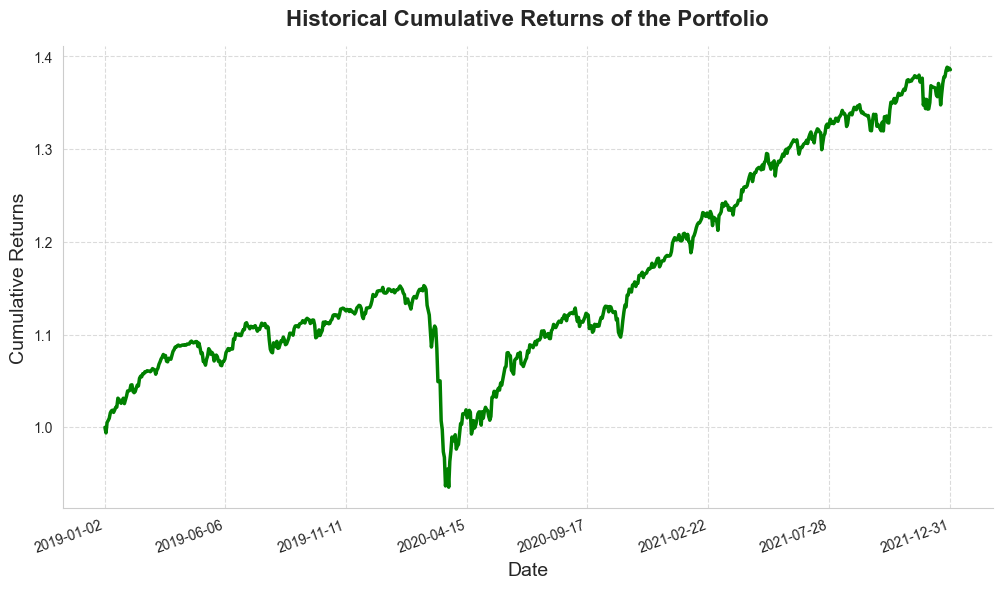

In [10]:
# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Calculate portfolio daily returns (weighted sum of asset returns)
portfolio_daily_returns = (daily_returns * portfolio_weights).sum(axis=1)

# Calculate cumulative returns
cumulative_returns = (1 + portfolio_daily_returns).cumprod()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=cumulative_returns.index, y=cumulative_returns, color="green", linewidth=2.5)

# Add labels and title with improved styling
plt.title('Historical Cumulative Returns of the Portfolio', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Set 8 evenly spaced tick marks on x-axis
num_ticks = 8
tick_positions = np.linspace(0, len(cumulative_returns.index) - 1, num_ticks, dtype=int)
tick_labels = cumulative_returns.index[tick_positions]

plt.xticks(tick_labels, rotation=20, ha='right')  # Rotate labels for better readability

# Remove top & right borders for a cleaner look
sns.despine()

# Show the plot
plt.show()

<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [11]:
# Calculate annualized return
annualized_return = ((1 + portfolio_daily_returns.mean()) ** 261 - 1) * 100  # 261 trading days in a year
print(f"Annualized Return of the Portfolio: {annualized_return:.2f}%")

Annualized Return of the Portfolio: 11.89%


<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [12]:
# Calculate annualized volatility
annualized_volatility = portfolio_daily_returns.std() * np.sqrt(261) * 100  # 261 trading days in a year
print(f"Annualized Volatility of the Portfolio: {annualized_volatility:.2f}%")

Annualized Volatility of the Portfolio: 8.51%


<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

**Step 1: Merge `portfolio_weights` with `asset_information` to get asset categories. Assign the result to `portfolio_weights_categories`.**

In [13]:
# Merge portfolio_weights with asset_information to get asset categories

# First, transpose portfolio_weights to match asset_information format
portfolio_weights_transposed = portfolio_weights.T.reset_index()
portfolio_weights_transposed.rename(columns={'index': 'Name'}, inplace=True)

# Merge on the 'Name' column
portfolio_weights_with_categories = portfolio_weights_transposed.merge(asset_information, on='Name', how='left')

# Transpose back to the original format (with categories as a new column)
portfolio_weights_with_categories.set_index(['Name', 'Family'], inplace=True)
portfolio_weights_with_categories = portfolio_weights_with_categories.T

# Display the merged DataFrame
print(portfolio_weights_with_categories.head())

Name             Asset1       Asset2    Asset3   Asset4      Asset5
Family     Fixed Income Fixed Income    Equity   Equity Alternative
2019-01-02     0.225458     0.116255  0.265003  0.23031    0.162974
2019-01-03     0.225458     0.116255  0.265003  0.23031    0.162974
2019-01-04     0.225458     0.116255  0.265003  0.23031    0.162974
2019-01-07     0.225458     0.116255  0.265003  0.23031    0.162974
2019-01-08     0.225458     0.116255  0.265003  0.23031    0.162974


**Step 2: Group `portfolio_weights_with_categories` by each `Family` category. Then sum over each category to get asset weights by their categories. Assign the result to `grouped_weights`.**

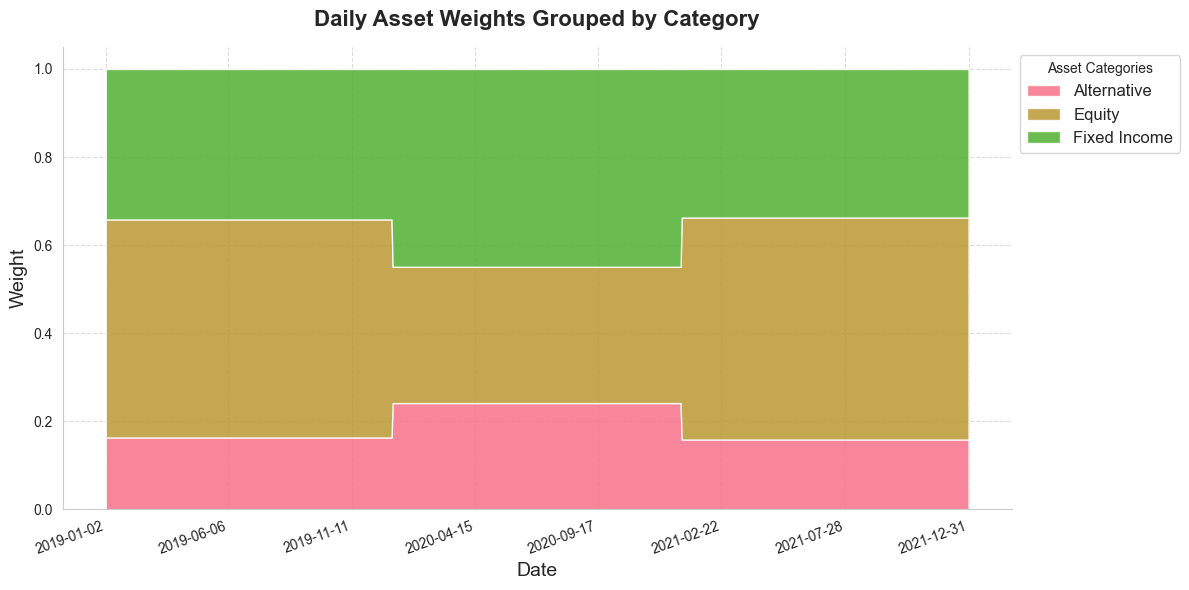

In [14]:
# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("husl")

# Group weights by asset categories
grouped_weights = portfolio_weights_with_categories.groupby('Family', axis=1).sum()

# Create figure
plt.figure(figsize=(12, 6))

# Generate area chart with Seaborn styling
plt.stackplot(grouped_weights.index, grouped_weights.T, labels=grouped_weights.columns, alpha=0.85)

# Add labels and title with improved styling
plt.title('Daily Asset Weights Grouped by Category', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weight', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Set better x-axis tick spacing (8 evenly spaced ticks)
num_ticks = 8
tick_positions = np.linspace(0, len(grouped_weights.index) - 1, num_ticks, dtype=int)
tick_labels = grouped_weights.index[tick_positions]
plt.xticks(tick_labels, rotation=20, ha='right')

# Improve legend placement
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, title="Asset Categories")

# Remove top & right borders for a cleaner look
sns.despine()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()